# Demonstrating the Effect of Dropout with Adam Optimizer

This notebook aims to illustrate how Dropout can improve the generalization of a neural network, potentially reducing overfitting. We will use the Adam optimizer for training both a baseline model and a model with Dropout on the `make_moons` dataset.

**How Dropout Works:**
Dropout is a regularization technique that randomly sets a fraction of input units to 0 at each update during training time. This helps prevent complex co-adaptations on training data, making the learned features more robust. It's like training many different thinned networks and averaging their predictions (though not explicitly). During inference (testing/prediction), dropout is turned off, and the weights are typically scaled down by the dropout rate to account for the larger number of active neurons.

**Dropout Rate:** The `dropout_rate` (e.g., 0.3 means 30% of neurons are dropped) is a hyperparameter. A different rate might yield different results. Too high a rate can lead to underfitting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)

## 1. Generate and Prepare Data

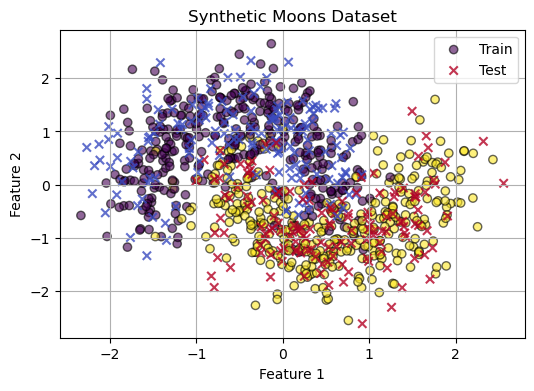

In [2]:
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42) # Slightly more noise/samples to encourage overfitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

plt.figure(figsize=(6,4))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolors='k', alpha=0.6, label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', alpha=0.8, marker='x', label='Test')
plt.title("Synthetic Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

## 2. Define Neural Network Models
We will define two models:
1.  **Baseline Model:** A simple FCNN without Dropout.
2.  **Dropout Model:** The same FCNN architecture but with Dropout layers.

In [3]:
def create_baseline_model(input_shape):
    tf.random.set_seed(42) # For consistent weight initialization
    model = Sequential([
        Input(shape=input_shape),
        Dense(128, activation='relu', kernel_initializer='he_normal'),
        Dense(64, activation='relu', kernel_initializer='he_normal'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

def create_dropout_model(input_shape, dropout_rate=0.3):
    tf.random.set_seed(42) # For consistent weight initialization
    model = Sequential([
        Input(shape=input_shape),
        Dense(128, activation='relu', kernel_initializer='he_normal'),
        Dropout(dropout_rate), # Dropout after the first hidden layer's activation
        Dense(64, activation='relu', kernel_initializer='he_normal'),
        Dropout(dropout_rate), # Dropout after the second hidden layer's activation
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

input_shape = (X_train.shape[1],)

print("--- Baseline Model Summary ---")
baseline_model_summary = create_baseline_model(input_shape)
baseline_model_summary.summary()

print("\n--- Dropout Model Summary ---")
dropout_model_summary = create_dropout_model(input_shape)
dropout_model_summary.summary()

--- Baseline Model Summary ---


2025-06-15 09:28:35.953617: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-06-15 09:28:35.953645: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-06-15 09:28:35.953649: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2025-06-15 09:28:35.953663: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-06-15 09:28:35.953671: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,705 (34.00 KB)

 Trainable params: 8,705 (34.00 KB)

 Non-trainable params: 0 (0.00 B)


--- Dropout Model Summary ---


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,705 (34.00 KB)

 Trainable params: 8,705 (34.00 KB)

 Non-trainable params: 0 (0.00 B)

## 3. Train the Models

In [4]:
epochs = 150 # Longer training to potentially see overfitting
batch_size = 32

print("\n--- Training Baseline Model ---")
baseline_model = create_baseline_model(input_shape)
history_baseline = baseline_model.fit(X_train, y_train,
                                    epochs=epochs,
                                    batch_size=batch_size,
                                    validation_data=(X_test, y_test),
                                    verbose=0)
print("Baseline model training finished.")

print("\n--- Training Dropout Model ---")
dropout_model = create_dropout_model(input_shape, dropout_rate=0.3)
history_dropout = dropout_model.fit(X_train, y_train,
                                  epochs=epochs,
                                  batch_size=batch_size,
                                  validation_data=(X_test, y_test),
                                  verbose=0)
print("Dropout model training finished.")


--- Training Baseline Model ---


2025-06-15 09:28:36.313785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


Baseline model training finished.

--- Training Dropout Model ---
Dropout model training finished.


## 4. Evaluate and Visualize Performance

Baseline Model - Test Loss: 0.6343, Test Accuracy: 0.8167
Dropout Model  - Test Loss: 0.3700, Test Accuracy: 0.8167


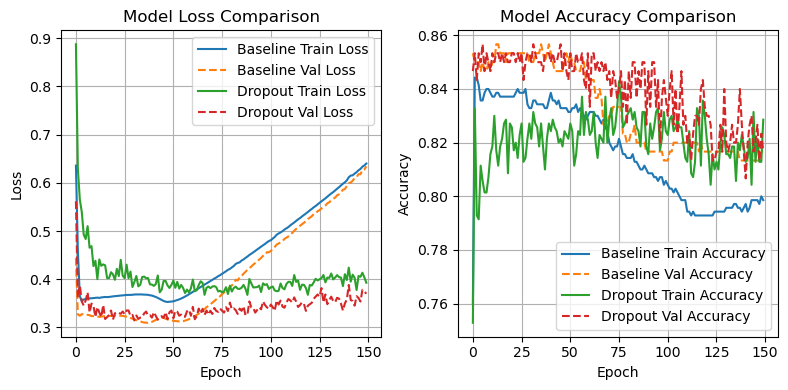

In [5]:
# Evaluate final performance
loss_baseline, acc_baseline = baseline_model.evaluate(X_test, y_test, verbose=0)
loss_dropout, acc_dropout = dropout_model.evaluate(X_test, y_test, verbose=0)

print(f"Baseline Model - Test Loss: {loss_baseline:.4f}, Test Accuracy: {acc_baseline:.4f}")
print(f"Dropout Model  - Test Loss: {loss_dropout:.4f}, Test Accuracy: {acc_dropout:.4f}")

# Plotting function
def plot_history(histories, titles):
    plt.figure(figsize=(8, 4))
    
    # Plot Loss
    plt.subplot(1, 2, 1)
    for i, history in enumerate(histories):
        plt.plot(history.history['loss'], label=f'{titles[i]} Train Loss')
        plt.plot(history.history['val_loss'], label=f'{titles[i]} Val Loss', linestyle='--')
    plt.title('Model Loss Comparison')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid(True)
    
    # Plot Accuracy
    plt.subplot(1, 2, 2)
    for i, history in enumerate(histories):
        plt.plot(history.history['accuracy'], label=f'{titles[i]} Train Accuracy')
        plt.plot(history.history['val_accuracy'], label=f'{titles[i]} Val Accuracy', linestyle='--')
    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

plot_history([history_baseline, history_dropout], ['Baseline', 'Dropout'])

## 5. Average Performance

In [6]:
epochs = 50 # Shorter training to avoid overfitting
batch_size = 32


acc_base_list = []
acc_dropout_list = []
loss_base_list = []
loss_dropout_list = []

for seed in range(5):
    # splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

    # standardization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Training Baseline Model
    baseline_model = create_baseline_model(input_shape)
    history_baseline = baseline_model.fit(X_train, y_train,
                                        epochs=epochs,
                                        batch_size=batch_size,
                                        verbose=0)
    
    # Training Dropout Model
    dropout_model = create_dropout_model(input_shape, dropout_rate=0.3)
    history_dropout = dropout_model.fit(X_train, y_train,
                                      epochs=epochs,
                                      batch_size=batch_size,
                                      verbose=0)
    # compute loss and acc on test dataset
    loss_baseline, acc_baseline = baseline_model.evaluate(X_test, y_test, verbose=0)
    loss_dropout, acc_dropout = dropout_model.evaluate(X_test, y_test, verbose=0)

    # collect
    loss_base_list.append(loss_baseline)
    loss_dropout_list.append(loss_dropout)
    acc_base_list.append(acc_baseline)
    acc_dropout_list.append(acc_dropout)

    print("Experiment ", seed + 1, "is done")


print("\n\nBaseline model avg accuracy: ", np.mean(acc_base_list))
print("Baseline model avg loss: ", np.mean(loss_base_list))
print("\nDropout model avg accuracy: ", np.mean(acc_dropout_list))
print("Dropout model avg loss: ", np.mean(loss_dropout_list))

Experiment  1 is done
Experiment  2 is done
Experiment  3 is done
Experiment  4 is done
Experiment  5 is done


Baseline model avg accuracy:  0.8293333411216736
Baseline model avg loss:  0.36652863025665283

Dropout model avg accuracy:  0.8580000162124634
Dropout model avg loss:  0.3222952902317047


## 6. Discussion

**Observations (you should be able to answer these questions):**

*   **Overfitting in Baseline Model:** Did the baseline model show signs of overfitting? (i.e., training accuracy much higher than validation accuracy, or validation loss starting to increase while training loss continues to decrease).

*   **Effect of Dropout:**
    *   How did the training loss/accuracy of the dropout model compare to the baseline during training? (Dropout often makes training accuracy a bit lower or converge slower because the model is being regularized).
    *   How did the *validation* loss/accuracy of the dropout model compare? Did dropout help reduce the gap between training and validation performance?
    *   Did the dropout model achieve better (or more stable) validation accuracy/loss by the end of training?

*   **Generalization:** Based on the validation metrics, which model appears to generalize better to unseen data?



